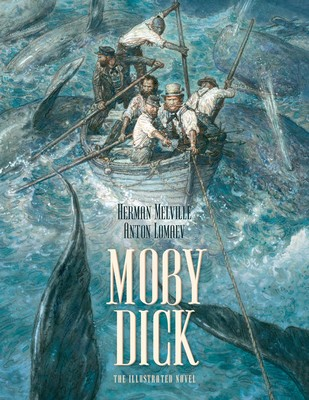

1. Text processing tools

 Which words appear most frequently and how frequently in Herman Melville's Moby Dick?

 In this notebook, we will use the Python package requests to scrape the book Moby Dick from the Project Gutenberg website, which has a vast collection of books. Next, we'll use BeautifulSoup to extract words from this site data. Lastly, we will use Counter and the Natural Language ToolKit (nltk) to analyse the word distribution.

 The word frequency distributions of any novel available on Project Gutenberg can be visualised using the Data Science pipeline we'll construct in this notebook. Since a large amount of the world's data is unstructured and contains a lot of text, the natural language processing technologies utilised here are applicable to a large chunk of the data that data scientists come across.

 Let's start by loading in the three main Python packages we are going to use

 Reference: https://projects.datacamp.com/projects/38


In [102]:
# Importing requests, BeautifulSoup, nltk, and Counter
import requests
from bs4 import BeautifulSoup
import nltk
# import RegexpTokenizer() method from nltk
from nltk.tokenize import RegexpTokenizer
from collections import Counter

2. Request for Moby Dick

 We must obtain the contents of Moby Dick in order to analyse it. Fortunately, Project Gutenberg has the text available for free online as an HTML file: https://www.gutenberg.org/files/2701/2701-h/2701-h.htm.

 Keep in mind that HTML, which stands for Hypertext Markup Language, is the web's standard markup language.

 We will use the request package to make a GET request for the website, which means we are getting data from it, in order to retrieve the HTML file with Moby Dick. This is the same thing you do when you view a webpage in a browser, but now we're getting the requested page straight into Python.

In [103]:
# Getting the Moby Dick HTML
r = requests.get('https://s3.amazonaws.com/assets.datacamp.com/production/project_147/datasets/2701-h.htm')

# Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

# Extracting the HTML from the request object
html = r.text

# Printing the first 2000 characters in html
print(html[0:2000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Moby Dick; Or the Whale, by Herman Melville
    </title>
    <style type="text/css" xml:space="preserve">

    body { background:#faebd0; color:black; margin-left:15%; margin-right:15%; text-align:justify }
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; m

3. Get the text from the HTML

 This HTML is not quite what we want. However, it does contain what we want: the text of Moby Dick. What we need to do now is wrangle this HTML to extract the text of the novel. For this we'll use the package BeautifulSoup.

 Firstly, a word on the name of the package: Beautiful Soup? In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. What Beautiful Soup does best is to make tag soup beautiful again and to extract information from it with ease! In fact, the main object created and queried when using this package is called BeautifulSoup.

In [104]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html.parser")

# Getting the text out of the soup
text = soup.get_text()

# Printing out text between characters 32000 and 34000
print(text[33000:35000])

amy Sabbath afternoon. Go from Corlears
      Hook to Coenties Slip, and from thence, by Whitehall, northward. What do
      you see?—Posted like silent sentinels all around the town, stand
      thousands upon thousands of mortal men fixed in ocean reveries. Some
      leaning against the spiles; some seated upon the pier-heads; some looking
      over the bulwarks of ships from China; some high aloft in the rigging, as
      if striving to get a still better seaward peep. But these are all
      landsmen; of week days pent up in lath and plaster—tied to counters,
      nailed to benches, clinched to desks. How then is this? Are the green
      fields gone? What do they here?
    

      But look! here come more crowds, pacing straight for the water, and
      seemingly bound for a dive. Strange! Nothing will content them but the
      extremest limit of the land; loitering under the shady lee of yonder
      warehouses will not suffice. No. They must get just as nigh the water as
   

4. Extract the words

 We now have the text of the novel! There is some unwanted stuff at the start and some unwanted stuff at the end. We could remove it, but this content is so much smaller in amount than the text of Moby Dick that, to a first approximation, it is okay to leave it in.

 Now that we have the text of interest, it's time to count how many times each word appears, and for this we'll use nltk – the Natural Language Toolkit. We'll start by tokenizing the text, that is, remove everything that isn't a word (whitespace, punctuation, etc.) and then split the text into a list of words.

In [105]:
# Creating a tokenizer
tokenizer = RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens
tokens[0:8]

['Moby', 'Dick', 'Or', 'the', 'Whale', 'by', 'Herman', 'Melville']

5. Make the words lowercase

 OK! We're nearly there. Note that in the above 'Or' has a capital 'O' and that in other places it may not, but both 'Or' and 'or' should be counted as the same word. For this reason, we should build a list of all words in Moby Dick in which all capital letters have been made lower case.

In [106]:
# Create a list called words containing all tokens transformed to lower-case
words = [token.lower() for token in tokens]

# Printing out the first 8 words / tokens
words[:8]

['moby', 'dick', 'or', 'the', 'whale', 'by', 'herman', 'melville']

6. Load in stop words

 It is common practice to remove words that appear a lot in the English language such as 'the', 'of' and 'a' because they're not so interesting. Such words are known as stop words. The package nltk includes a good list of stop words in English that we can use.

In [107]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [108]:
# Getting the English stop words from nltk
StopWords = nltk.corpus.stopwords.words('english')

# Printing out the  stop words
StopWords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

7. Remove stop words in Moby Dick

 We now want to create a new list with all words in Moby Dick, except those that are stop words (that is, those words listed in sw).

In [109]:
# Create a list words_nsw containing all words that are in words but not in sw
words_nsw = [word for word in words if word not in StopWords]

# Printing the first 10 words_ns to check that  stop words are gone
words_nsw[:10]

['moby',
 'dick',
 'whale',
 'herman',
 'melville',
 'project',
 'gutenberg',
 'ebook',
 'moby',
 'dick']

8. We have the answer

 Our original question was:

 What are the most frequent words in Herman Melville's novel Moby Dick and how often do they occur?

 We are now ready to answer that! Let's answer this question using the Counter class we imported earlier.

In [110]:
# Initialize a Counter object from our processed list of words
count = Counter(words_nsw)

# Store 10 most common words and their counts as top_ten
top_ten = count.most_common(10)

# Print the top ten words and their counts
print(top_ten)

[('whale', 1246), ('one', 925), ('like', 647), ('upon', 568), ('man', 527), ('ship', 519), ('ahab', 517), ('ye', 473), ('sea', 455), ('old', 452)]


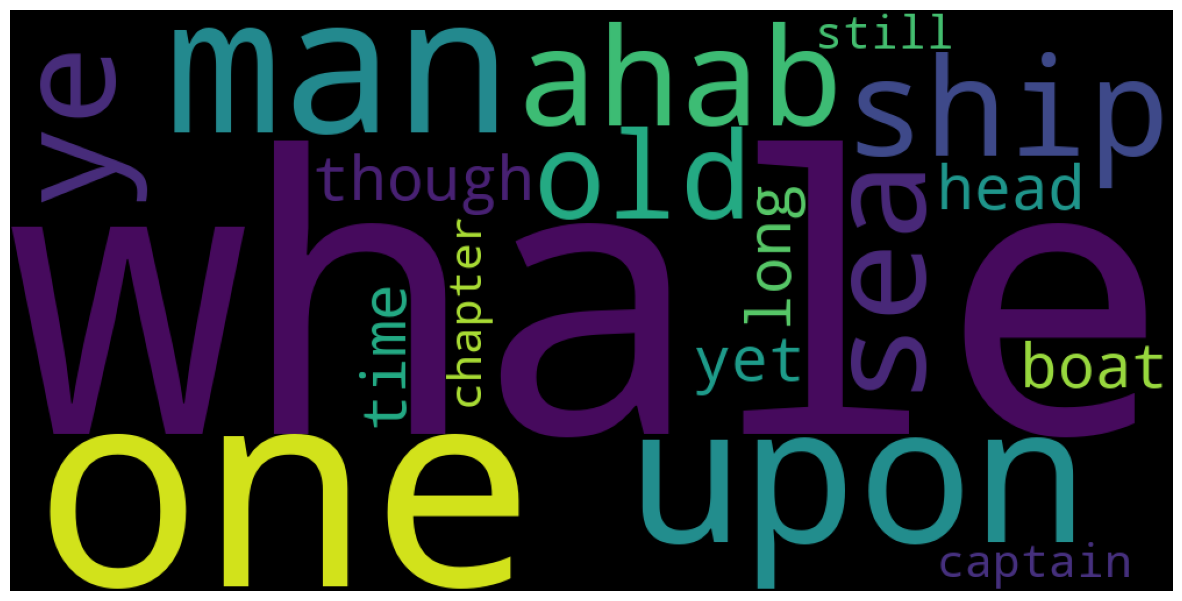

In [111]:
# What's the most common word in Moby Dick?
# Import the following libraries which are required to create a Word Cloud
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

top_words = count.most_common(20)
top_20 = []
i = 0
while i < len(top_words):
  top_20.append(top_words[i][0])
  i += 1

#convert list to string and generate
unique_string=(" ").join(top_20) #The .join() method takes a list of strings and combines (joins) them into a single string
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()